In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\reema\Documents\COVIDSenti-A.csv")

In [3]:
data

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [4]:
data.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [5]:
data.shape

(30000, 2)

In [6]:
data.columns

Index(['tweet', 'label'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [8]:
data.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,COVID-19,neu
freq,3,22949


In [9]:
data.label.value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

In [10]:
#checking for null values

data.isnull().sum()

tweet    0
label    0
dtype: int64

In [11]:
data[data["label"]=="pos"]

,tweet,label
70,Novel #Wuhan #coronavirus virus cases leap up....,pos
104,As #coronavirus spreads to more cities in #Chi...,pos
111,Experts fear latest strain of virus may spread...,pos
113,Human-to-Human Transmission Confirmed in China...,pos
128,"The coronavirus has struck 222 people in Asia,...",pos
...,...,...
29953,"#COVID-19 | Death toll in #China crosses 2,590...",pos
29957,@KimDamore @BNODesk He‚Äôs on top of the Coron...,pos
29971,https://t.co/vUlcLEL0Bm\nüîùü¶† CoronaVirus ...,pos
29976,#coronavirus Many junior government staff who ...,pos


In [12]:
data[data["label"]=="neg"]

,tweet,label
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
8,@tezuma75 Why #CCP keep on saying unknown caus...,neg
11,I always feel weird hoping for another coronav...,neg
16,@KariDebbink @Vineet321 The Frieman Scary Scal...,neg
18,"Crap, a quick blast search suggests the Wuhan ...",neg
...,...,...
29970,One can only hope that an upside of this #coro...,neg
29975,@cnni A deadly outbreak of the coronavirus eme...,neg
29982,Samsung Shuts Down Factory in South Korea Due ...,neg
29991,"@heidijo1 @brianschatz Come Novemeber, if he‚Ä...",neg


In [13]:
data[data["label"]=="neu"]

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
5,The mystery new virus causing #China pneumonia...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [14]:
data[data["label"]=="pos"].loc[70,"tweet"]

"Novel #Wuhan #coronavirus virus cases leap up.\nLatest blog, which doesn't include 1 case from Shenzhen and 2 cases‚Ä¶ https://t.co/lJks3nQK10"

In [15]:
data[data["label"]=="neg"].loc[16,"tweet"]

'@KariDebbink @Vineet321 The Frieman Scary Scale makes its debut. Wuhan Coronavirus scores 3 out of 10 N95 masks.'

In [16]:
data[data["label"]=="neu"].loc[57,"tweet"]

'@TONGSONG1984 #CCP #China also export #WuhanPneumonia #coronavirus \nhttps://t.co/BQSbfg2Ek3'

From the above tweets we can understand that the texts are not plain. We have to clean this text

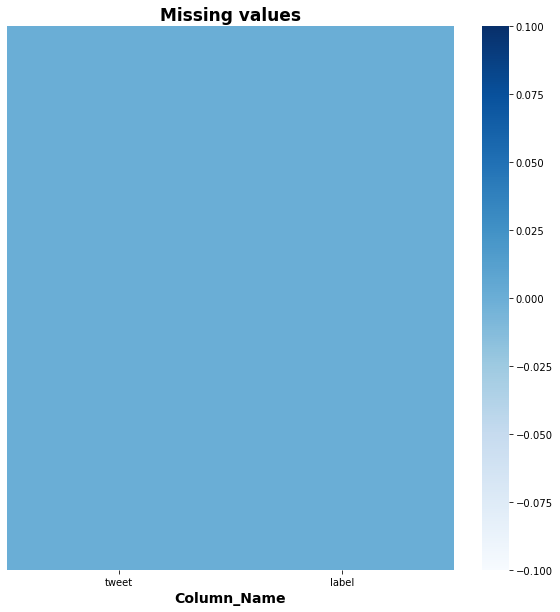

In [17]:
#Heat Map 


plt.figure(figsize=(10, 10))
sns.heatmap(data.isnull(), cbar=True, cmap ="Blues",yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Missing values",fontweight="bold",size=17)
plt.show()

There is no missing values in the dataset

In [18]:
#Data Preprocessing

import re 

In [19]:
#Write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,"",input_txt)
    return input_txt

In [20]:
#To create new column with removed @user
data["tweet"] = np.vectorize(remove_pattern)(data["tweet"], '@[\w]*')

In [21]:
#To remove HTTP and urls from tweets
data['tweet'] = data['tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [22]:
#To remove special characters, numbers, punctuations
data['tweet'] = data['tweet'].str.replace('[^a-zA-Z#]+',' ')

<ipython-input-22-a833f7fb861e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tweet'] = data['tweet'].str.replace('[^a-zA-Z#]+',' ')


In [23]:
data["tweet"] = data["tweet"].str.replace('#',' ')

In [24]:
#Converting to lower case
data["tweet"]=data["tweet"].str.lower() 

In [25]:
data.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that s true corona virus swine flue bird flu ...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [26]:
data.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that s true corona virus swine flue bird flu ...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [27]:
#To remove short words
data["tweet"] = data["tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [28]:
data.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that true corona virus swine flue bird flu dec...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [29]:
data[data["label"]=="neu"].loc[57,"tweet"]

'ccp china also export wuhanpneumonia coronavirus'

In [30]:
#To create new variable tokenized tweet 
token_tweet = data["tweet"].apply(lambda x: x.split())

In [31]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\reema\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
  
token_tweet = token_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [33]:
#To lemmatize

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

token_tweet = token_tweet.apply(lambda x: [lem.lemmatize(i) for i in x])

In [34]:
token_tweet

0             [coronavirus, human, coronavirus, type, cdc]
1        [that, true, corona, virus, swine, flue, bird,...
2        [tldr, not, sars, possibly, new, coronavirus, ...
3        [disease, outbreak, news, from, the, who, midd...
4        [china, medium, wsj, say, source, tell, them, ...
                               ...                        
29995    [cdc, test, confirms, westerdam, cruise, ship,...
29996    [two, doctor, die, coronavirus, within, hour, ...
29997    [beijing, the, lockdown, guo, jing, neighbourh...
29998    [coronavirusoutbreak, balochistan, cpec, route...
29999    [the, australian, dollar, ha, hit, fresh, deca...
Name: tweet, Length: 30000, dtype: object

In [35]:
#To join tokens into one sentence
for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])

In [36]:
data["Tweet"]  = token_tweet

In [37]:
data.drop("tweet",axis=1,inplace=True)

In [38]:
data.head()

,label,Tweet
0,neu,coronavirus human coronavirus type cdc
1,neu,that true corona virus swine flue bird flu dec...
2,neg,tldr not sars possibly new coronavirus difficu...
3,neu,disease outbreak news from the who middle east...
4,neu,china medium wsj say source tell them mystery ...


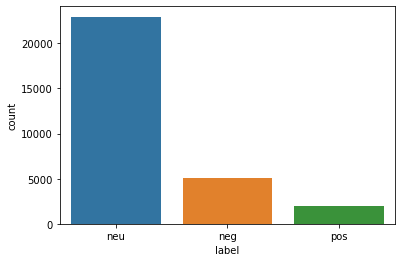

In [39]:
sns.countplot(x="label", data=data)
plt.show()

In [40]:
X = data["Tweet"]
y = data["label"]

In [41]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 5000)
tfidf_vect.fit(data["Tweet"])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [43]:
print(X_train_tfidf)

  (0, 4459)	0.15254756684997578
  (0, 2440)	0.7546121735513383
  (0, 1690)	0.4554074829048486
  (0, 928)	0.09013751255900064
  (0, 83)	0.43791433034353094
  (1, 4911)	0.1980191324455161
  (1, 4548)	0.41326740282605645
  (1, 4545)	0.32297162147904135
  (1, 3402)	0.3530702152613797
  (1, 3137)	0.30359245556876774
  (1, 2850)	0.26165809757608954
  (1, 1764)	0.34338063230624294
  (1, 928)	0.050309964033426836
  (1, 703)	0.11829844515957644
  (1, 698)	0.3072131428437948
  (1, 672)	0.3495945134031423
  (1, 150)	0.2221796130773604
  (2, 4511)	0.27342593022174905
  (2, 4457)	0.20860393106910083
  (2, 3485)	0.4187086827024766
  (2, 2662)	0.35751609101416015
  (2, 2546)	0.5364040806874096
  (2, 1761)	0.17735369676277984
  (2, 1718)	0.2437851874794707
  (2, 1526)	0.4161360343675392
  :	:
  (20996, 2295)	0.26012059175713426
  (20996, 1531)	0.34981430154583104
  (20996, 915)	0.165243657104631
  (20996, 374)	0.3389522141777374
  (20996, 158)	0.15249072342143608
  (20997, 4873)	0.3931445245472843
  (

In [44]:
print(X_test_tfidf)

  (0, 4831)	0.37061332307614175
  (0, 4750)	0.14181812510381755
  (0, 4459)	0.09110166422214645
  (0, 3169)	0.2564222806560311
  (0, 2610)	0.2184148848345195
  (0, 1800)	0.3153434495026351
  (0, 1672)	0.3096471603284962
  (0, 1497)	0.3777753966298944
  (0, 1372)	0.40626115702918625
  (0, 1250)	0.24871537531923515
  (0, 975)	0.2407689787290732
  (0, 915)	0.15095705838320325
  (0, 710)	0.18602249573423496
  (0, 120)	0.20117094349262749
  (1, 4592)	0.2994602415224618
  (1, 4459)	0.09200968959838861
  (1, 4241)	0.4330926897515855
  (1, 3264)	0.22496936125741834
  (1, 3073)	0.2167628783701846
  (1, 2990)	0.23112615306842052
  (1, 2305)	0.3019029655307928
  (1, 2293)	0.23049628319665888
  (1, 1175)	0.4465920561832552
  (1, 928)	0.054366809795667485
  (1, 843)	0.3599773754280977
  :	:
  (8997, 928)	0.05422533859786681
  (8997, 349)	0.43196571279987267
  (8998, 4978)	0.19769671945964268
  (8998, 4206)	0.39889854661926355
  (8998, 4146)	0.35755845449599977
  (8998, 4129)	0.32696381603446467
  (

In [45]:
print(tfidf_vect.vocabulary_)

{'coronavirus': 928, 'human': 2167, 'type': 4637, 'cdc': 634, 'that': 4457, 'true': 4608, 'corona': 915, 'virus': 4750, 'swine': 4382, 'bird': 408, 'flu': 1743, 'december': 1099, 'when': 4847, 'whole': 4859, 'busy': 541, 'not': 3067, 'sars': 3835, 'possibly': 3398, 'new': 3016, 'difficult': 1213, 'confirm': 850, 'because': 355, 'patient': 3264, 'identified': 2197, 'later': 2549, 'infection': 2295, 'disease': 1250, 'outbreak': 3176, 'news': 3024, 'from': 1816, 'the': 4459, 'who': 4857, 'middle': 2836, 'east': 1389, 'respiratory': 3731, 'syndrome': 4391, 'mers': 2817, 'cov': 982, 'united': 4667, 'arab': 218, 'china': 703, 'medium': 2802, 'wsj': 4938, 'say': 3843, 'source': 4151, 'tell': 4428, 'them': 4463, 'mystery': 2963, 'pneumonia': 3368, 'something': 4129, 'ha': 1988, 'been': 361, 'causing': 625, 'same': 3824, 'family': 1634, 'and': 158, 'virologist': 4746, 'weigh': 4826, 'novel': 3073, 'chinese': 710, 'authority': 290, 'have': 2029, 'made': 2703, 'preliminary': 3434, 'why': 4861, 'c

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelBinarizer

In [47]:
svm_model = SVC(probability = True, kernel = "linear")
svm_model.fit(X_train_tfidf, y_train )

SVC(kernel='linear', probability=True)

In [48]:
svm_predictions = svm_model.predict(X_test_tfidf)
Predicted_data = pd.DataFrame()
Predicted_data["Tweet"] = X_test
Predicted_data["Label"] = svm_predictions
Predicted_data

,Tweet,Label
8225,duterte like welcome all chinese especially co...,neu
10794,cdc detailed information stating the infected ...,neu
9163,coronavirus update pandemic,neu
26591,more than healthcare personnel china infected ...,pos
6631,brent recoups china virus angst fed speak play...,neu
...,...,...
21914,united panic bought striker and are now tellin...,neu
17453,teehee coronavirus pangolin host,neu
20344,nzd usd technical bias bearish dow jones brush...,neu
1878,coronavirus sound like something you catch dri...,neu


In [49]:
Predicted_data["Label"].value_counts()

neu    7266
neg    1343
pos     391
Name: Label, dtype: int64

In [50]:
svm_accuracy = accuracy_score(svm_predictions, y_test)*100
svm_accuracy

90.34444444444445

In [51]:
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

Classification Report:
              precision    recall  f1-score   support

         neg       0.90      0.76      0.82      1591
         neu       0.91      0.97      0.94      6828
         pos       0.79      0.53      0.63       581

    accuracy                           0.90      9000
   macro avg       0.87      0.75      0.80      9000
weighted avg       0.90      0.90      0.90      9000

